In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv("dea_data.csv")
df.head()

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment16,Treatment17,Treatment18,Treatment19,Treatment20,Treatment21,Treatment22,Treatment23,Treatment24,Treatment25
0,Gene1,56,97,19,76,65,25,87,91,79,...,55,59,68,7,55,11,25,77,43,22
1,Gene2,8,93,64,18,13,94,57,6,88,...,91,66,44,89,84,86,57,28,30,93
2,Gene3,64,45,33,19,49,69,93,75,13,...,82,7,5,9,94,18,31,13,83,19
3,Gene4,94,46,81,55,67,56,8,98,27,...,74,76,31,13,66,41,55,48,28,83
4,Gene5,63,36,92,56,66,62,56,16,43,...,77,63,74,84,97,7,24,63,40,23


In [18]:
control_cols = [i for i in df.columns if "Control" in i]
treatment_cols = [i for i in df.columns if "Treatment" in i]

print("Column of Contols: ")
print(control_cols)

Column of Contols: 
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15', 'Control16', 'Control17', 'Control18', 'Control19', 'Control20', 'Control21', 'Control22', 'Control23', 'Control24', 'Control25']


In [14]:
# gene_rows = df.iloc[:, 0]

0       Gene1
1       Gene2
2       Gene3
3       Gene4
4       Gene5
       ...   
95     Gene96
96     Gene97
97     Gene98
98     Gene99
99    Gene100
Name: Gene, Length: 100, dtype: object


In [19]:
# Calculate the avg expression level of each gene under control condition
df['Avg_Control'] = df[control_cols] .mean(axis=1)
print(df[['Gene', 'Avg_Control']])

       Gene  Avg_Control
0     Gene1        53.52
1     Gene2        47.08
2     Gene3        45.16
3     Gene4        51.44
4     Gene5        48.04
..      ...          ...
95   Gene96        51.56
96   Gene97        49.32
97   Gene98        45.40
98   Gene99        58.08
99  Gene100        51.72

[100 rows x 2 columns]


In [20]:
# Calculate the avg expression level of each gene under treatment condition
df['Avg_Treatment'] = df[treatment_cols].mean(axis=1)
print(df[['Gene', 'Avg_Treatment']])

       Gene  Avg_Treatment
0     Gene1          54.88
1     Gene2          63.28
2     Gene3          47.92
3     Gene4          53.56
4     Gene5          53.24
..      ...            ...
95   Gene96          45.28
96   Gene97          52.36
97   Gene98          64.40
98   Gene99          55.60
99  Gene100          48.00

[100 rows x 2 columns]


In [21]:
# Highest Avg under treatment
#High_Trt = np.max(df['Avg_Treatment'])
#print(High_Trt)
# print(df[["Gene", "High_Trt"]])
High_Trt_Loc = df.loc[df['Avg_Treatment'].idxmax(), "Gene"]
High_Trt = np.max(df['Avg_Treatment'])
print(f"{High_Trt_Loc} \nValue: {High_Trt}")

Gene98 
Value: 64.4


In [22]:
# difference between Avg Control and Avg
df['Difference'] = df['Avg_Treatment'] - df['Avg_Control']
print(df[['Gene', 'Difference']])

       Gene  Difference
0     Gene1        1.36
1     Gene2       16.20
2     Gene3        2.76
3     Gene4        2.12
4     Gene5        5.20
..      ...         ...
95   Gene96       -6.28
96   Gene97        3.04
97   Gene98       19.00
98   Gene99       -2.48
99  Gene100       -3.72

[100 rows x 2 columns]


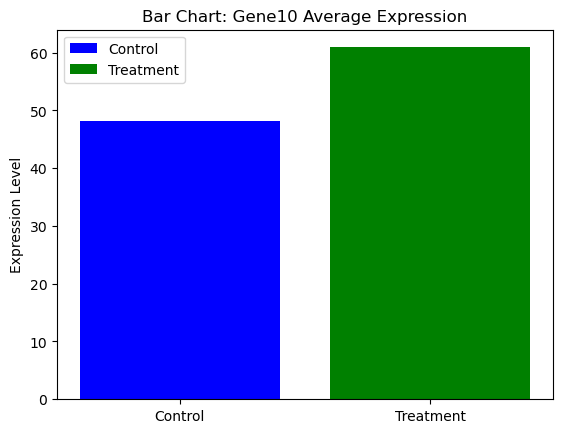

In [23]:
# Bar Chart for Gene10
gene ='Gene10'
gene_data = df[df['Gene'] == gene]

# Compute avgs
control_mean = gene_data[control_cols].mean(axis=1).values[0]
treatment_mean = gene_data[treatment_cols].mean(axis=1).values[0]

plt.bar('Control', control_mean, color = 'blue', label = 'Control')
plt.bar('Treatment', treatment_mean, color = 'green', label = 'Treatment')
plt.title(f'Bar Chart: {gene} Average Expression')
plt.ylabel('Expression Level')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

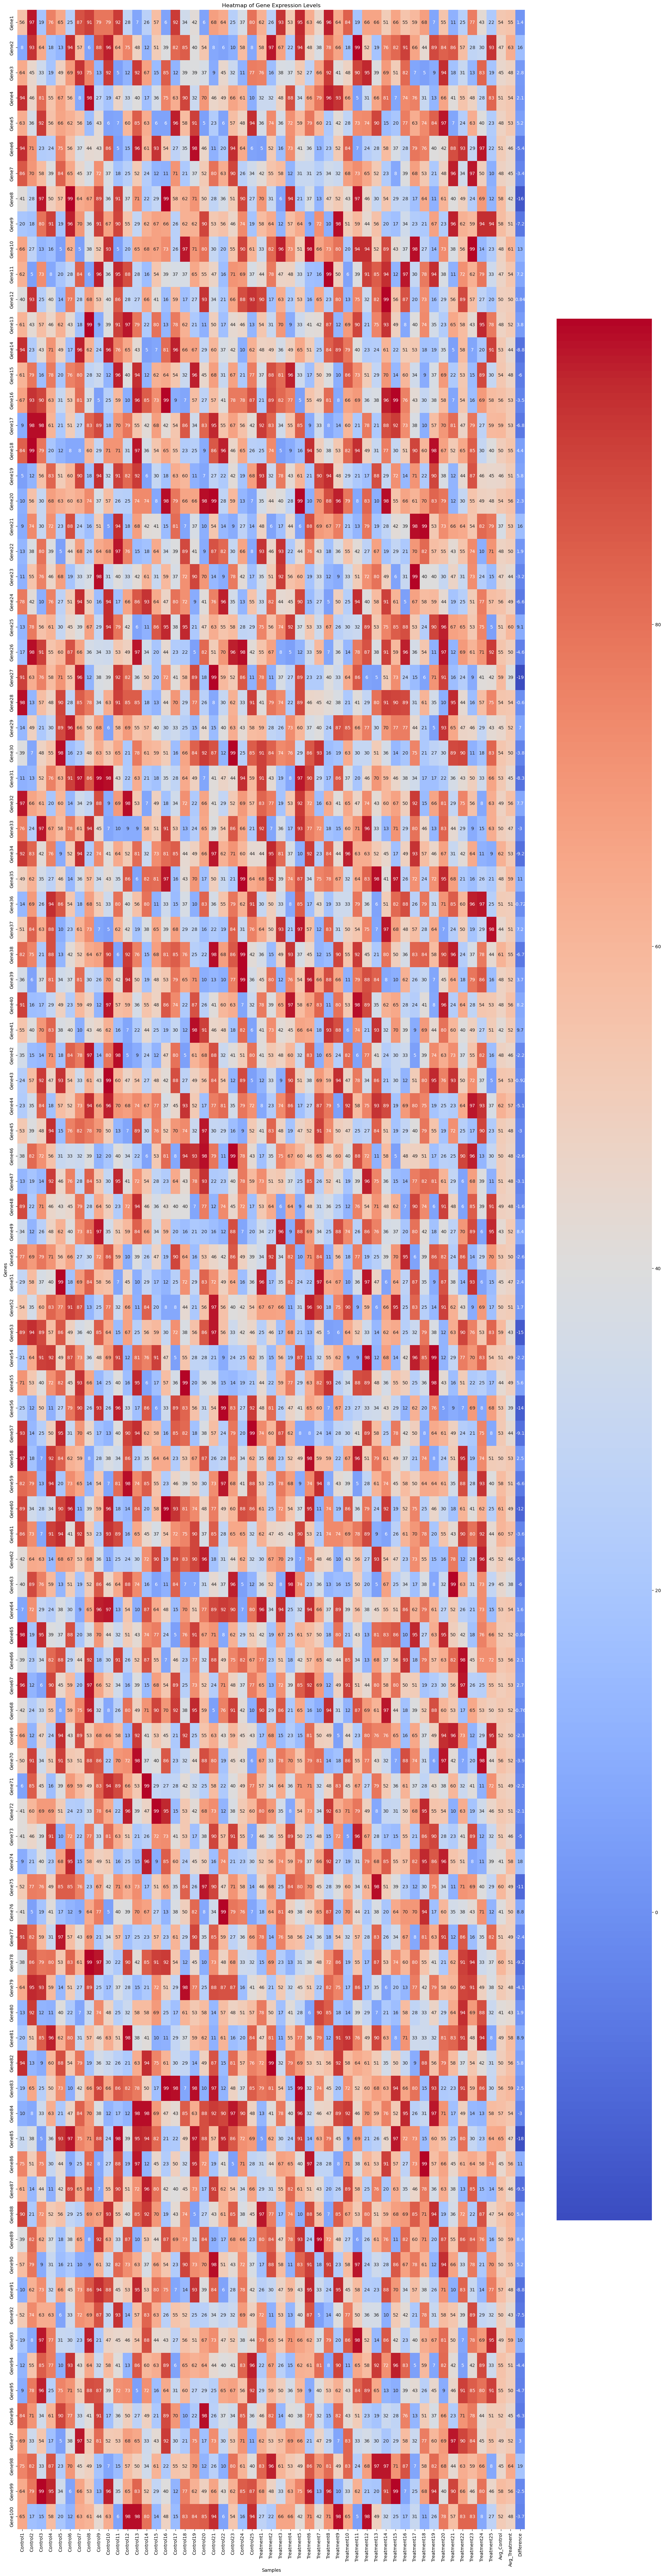

In [9]:
heatmap_data = df.set_index("Gene") # Set gene as rows
heatmap = heatmap_data.head(100)

plt.figure(figsize=(25,100))
sns.heatmap(heatmap, cmap='coolwarm', annot=True)
plt.title("Heatmap of Gene Expression Levels")
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show

In [32]:
# Upregulated genes (trt_avg > Ctr_avg)
upregulated = []
downregulated = []

for i in range(len(df)):
    gene = df.loc[i, "Gene"]
    diff = df.loc[i, "Difference"]
    if diff > 0:
        upregulated.append(gene)
    elif diff < 0:
        downregulated.append(gene)

In [29]:
# Downregulated genes (trt_avg < Ctr_avg)
# Upregulated genes (trt_avg > Ctr_avg)

print("Upregulated Genes are: ", upregulated)
print("\nDownregulated Genes: ", downregulated)

Upregulated Genes are:  ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene10', 'Gene11', 'Gene12', 'Gene13', 'Gene18', 'Gene19', 'Gene20', 'Gene21', 'Gene22', 'Gene25', 'Gene29', 'Gene32', 'Gene35', 'Gene37', 'Gene39', 'Gene40', 'Gene41', 'Gene49', 'Gene51', 'Gene52', 'Gene55', 'Gene58', 'Gene64', 'Gene66', 'Gene67', 'Gene74', 'Gene76', 'Gene80', 'Gene81', 'Gene82', 'Gene83', 'Gene86', 'Gene88', 'Gene89', 'Gene90', 'Gene93', 'Gene97', 'Gene98']

Downregulated Genes:  ['Gene6', 'Gene7', 'Gene8', 'Gene9', 'Gene14', 'Gene15', 'Gene16', 'Gene17', 'Gene23', 'Gene24', 'Gene26', 'Gene27', 'Gene28', 'Gene30', 'Gene31', 'Gene33', 'Gene34', 'Gene36', 'Gene38', 'Gene42', 'Gene43', 'Gene44', 'Gene45', 'Gene46', 'Gene47', 'Gene48', 'Gene50', 'Gene53', 'Gene54', 'Gene56', 'Gene57', 'Gene59', 'Gene60', 'Gene61', 'Gene62', 'Gene63', 'Gene65', 'Gene68', 'Gene69', 'Gene70', 'Gene71', 'Gene72', 'Gene73', 'Gene75', 'Gene77', 'Gene78', 'Gene79', 'Gene84', 'Gene85', 'Gene87', 'Gene91', 'Gene92', 'Gene94', 

C:\Users\Mohamed Ilham\AppData\Local\Temp\ipykernel_1968\965806772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gene", y="Expression", data=melted, palette="Set3")


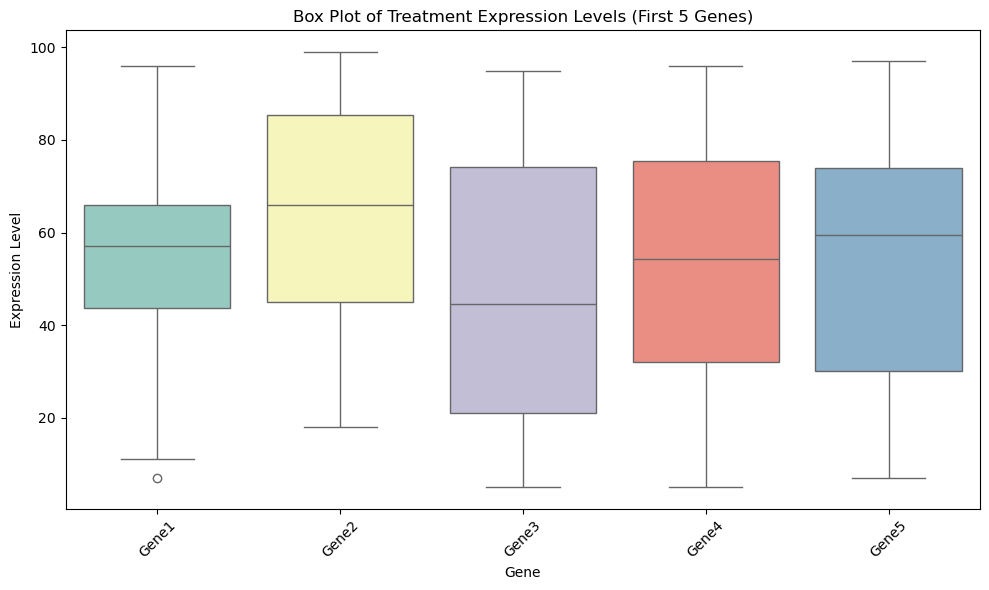

In [31]:
# Box plot of treatment expression levels for the first 5 genes
# Extract treatment columns (adjust if your column names differ)
first_5_genes = df.head(5)
treatment_cols = [col for col in df.columns if "Treatment" in col]

# Melt the DataFrame for Seaborn
melted = first_5_genes.melt(id_vars="Gene", value_vars=treatment_cols,
                            var_name="Treatment", value_name="Expression")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gene", y="Expression", data=melted, palette="Set3")
plt.title("Box Plot of Treatment Expression Levels (First 5 Genes)")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Overall mean expression for all control and treatment samples

# Identify all control and treatment columns
control_cols = [col for col in df.columns if "Control" in col]
treatment_cols = [col for col in df.columns if "Treatment" in col]

control_mean = df[control_cols].values.mean()
treatment_mean = df[treatment_cols].values.mean()

print(f"Overall mean expression for Control samples: {control_mean:.2f}")
print(f"Overall mean expression for Treatment samples: {treatment_mean:.2f}")

Overall mean expression for Control samples: 51.52
Overall mean expression for Treatment samples: 51.03


In [36]:
# Greatest overall variation (std deviation) across all samples

# Identify all sample columns
sample_cols = [col for col in df.columns if "Control" in col or "Treatment" in col]

# Calculate standard deviation for each sample column
std_devs = df[sample_cols].std()

# Greatest variation
max_std_col = std_devs.idxmax()
max_std_value = std_devs.max()

print(f"Sample with greatest variation: {max_std_col}")
print(f"Standard deviation: {max_std_value:.2f}")

Sample with greatest variation: Treatment8
Standard deviation: 30.88


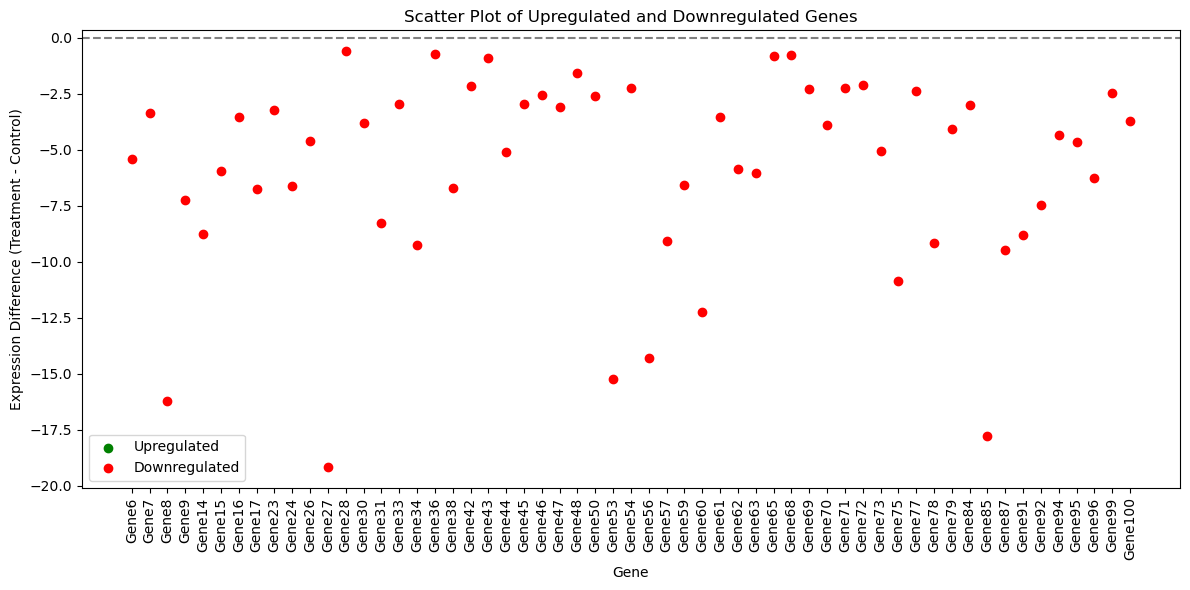

In [43]:
# Scatter plot for upregulated and downregulated

# Get differences for upregulated genes
up_diff = df[df["Gene"].isin(upregulated)][["Gene", "Difference"]]

# Get differences for downregulated genes
down_diff = df[df["Gene"].isin(downregulated)][["Gene", "Difference"]]

# Plot
plt.figure(figsize=(12, 6))

plt.scatter(up_diff["Gene"], up_diff["Difference"], color='green', label='Upregulated')
plt.scatter(down_diff["Gene"], down_diff["Difference"], color='red', label='Downregulated')

plt.axhline(0, color='gray', linestyle='--')
plt.title("Scatter Plot of Upregulated and Downregulated Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Difference (Treatment - Control)")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()